In [32]:
from pygam import LogisticGAM, LinearGAM, s, f
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
def returnDataset(filename):
    X = pd.read_csv('X_data_sample_trips.csv', skipinitialspace=True)
    y = pd.read_csv('y_data_sample_trips.csv', skipinitialspace=True)
    y = y.values.ravel()

    display(X.head())
    display(X.shape)
    display(y[:5])
    display(y.shape)

    return X, y

In [39]:
X, y = returnDataset('sampledata.csv')

,rideable_type,member_casual,day_of_week,month,season,trip_duration_mins,hour,day_of_month
0,0,1,2,11,3,25,17,21
1,1,0,0,9,3,135,9,3
2,1,0,4,7,2,13,9,20
3,1,0,2,7,2,6,11,11
4,0,0,0,9,3,55,10,3


(197794, 8)

array([1, 1, 6, 7, 2])

(197794,)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
gam = LinearGAM()

In [42]:
gam.fit(X_train, y_train)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + intercept,
   tol=0.0001, verbose=False)

In [43]:
y_pred = gam.predict(X_test)

In [44]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     74.7225
Link Function:                     IdentityLink Log Likelihood:                               -596258.8625
Number of Samples:                       138455 AIC:                                          1192669.1698
                                                AICc:                                         1192669.2538
                                                GCV:                                               29.1185
                                                Scale:                                             29.0902
                                                Pseudo R-Squared:                                    0.487
Feature Function                  Lam

/var/folders/ck/80shkg4905d30pl_yq732k180000gn/T/ipykernel_9386/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [45]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 29.054598728280226
R^2 Score: 0.4864111883927543


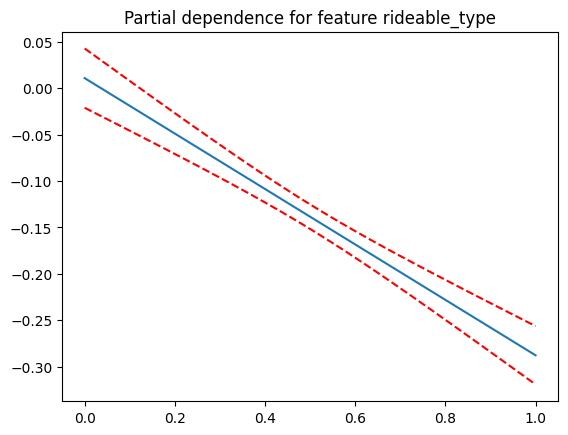

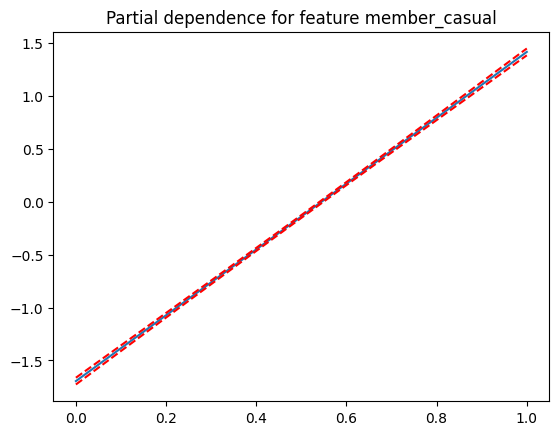

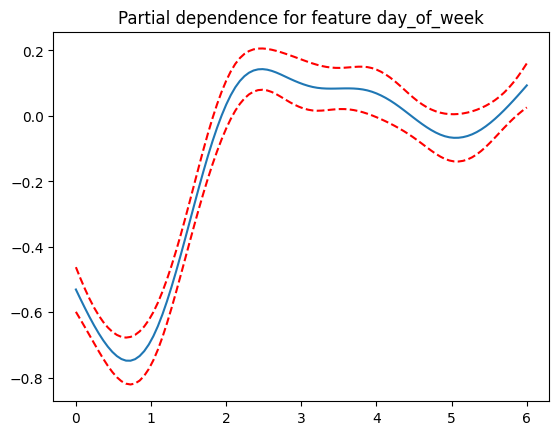

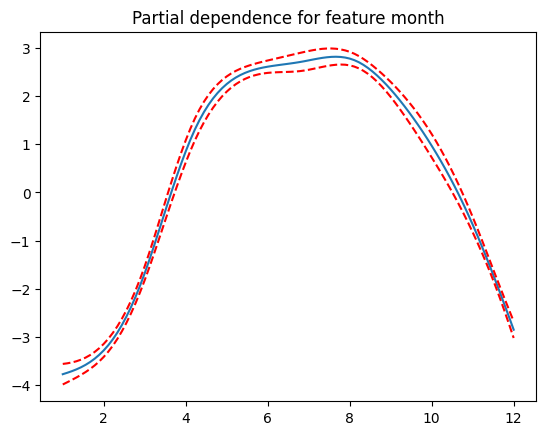

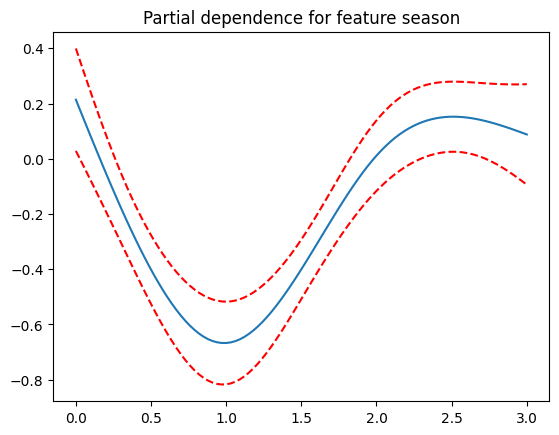

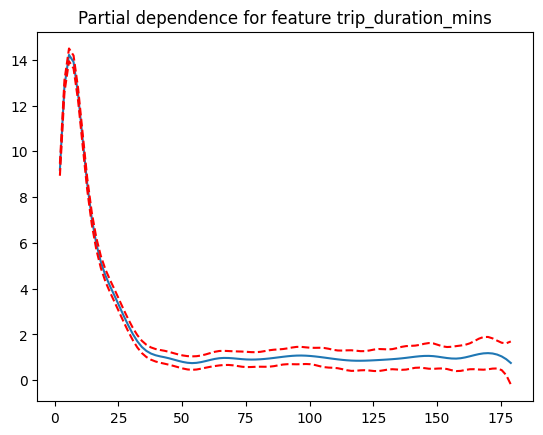

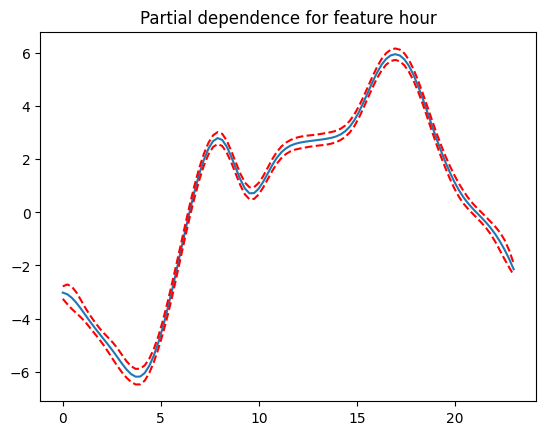

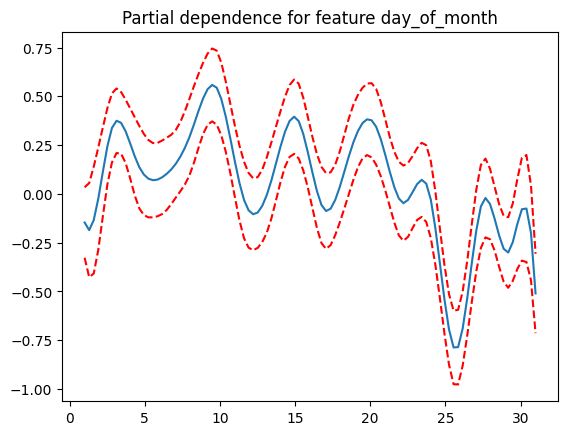

In [46]:
import matplotlib.pyplot as plt

for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, i], pdep)
    plt.plot(XX[:, i], confi, c='r', ls='--')
    plt.title(f'Partial dependence for feature {X.columns[i]}')
    plt.show()

In [30]:
X.columns

Index(['rideable_type', 'member_casual', 'date', 'day_of_week', 'month',
       'season', 'trip_duration_mins', 'hour'],
      dtype='object')